# Predict Housing Prices

**Given:** 506 data points from boston houses

**Find:** Predict the price given the attribute information

    :Attribute Information (in order):
            - CRIM     per capita crime rate by town
            - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
            - INDUS    proportion of non-retail business acres per town
            - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
            - NOX      nitric oxides concentration (parts per 10 million)
            - RM       average number of rooms per dwelling
            - AGE      proportion of owner-occupied units built prior to 1940
            - DIS      weighted distances to five Boston employment centres
            - RAD      index of accessibility to radial highways
            - TAX      full-value property-tax rate per $10,000
            - PTRATIO  pupil-teacher ratio by town
            - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
            - LSTAT    % lower status of the population
            - MEDV     Median value of owner-occupied homes in $1000's


In [61]:
%matplotlib inline



from pandas import Series, DataFrame

import pandas as pd

import numpy as np

from sklearn import datasets

import sklearn

import matplotlib.pyplot as plt

housing = datasets.load_boston()

print(housing.DESCR)




Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [62]:
columns = housing.feature_names

fhousing = DataFrame(X, columns = columns)

fhousing['MEDV'] = housing.target

fhousing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [63]:
fhousing.MEDV.describe()


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

Prediction v Accuracy


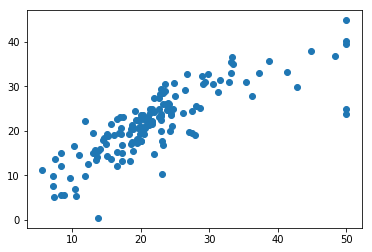

In [64]:
from sklearn.linear_model import LinearRegression

def split_test_data(X, y):
    
    
    X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
        
    return X_train, X_test, y_train, y_test





lr = LinearRegression()

x_train, x_test, y_train, y_test = split_test_data(fhousing.iloc[:, :-1], fhousing.iloc[:, -1])

lr.fit(x_train, y_train)

prediction = lr.predict(x_test)


df_ = x_test

df_['MEDV'] = y_test

df_['PREDICTION'] = prediction

df_['ERROR'] = df_.PREDICTION - df_.MEDV

df_.head()



print('Prediction v Accuracy')
plt.scatter(df_.MEDV, df_.PREDICTION)



### Error Analysis

In [65]:
mse = sklearn.metrics.mean_squared_error(y_test, prediction)

mse


27.18384764760318

### Summary


mse of 27 is fairly weak. 

we could try to introduce other models to test, like decision trees, or many others.